In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("GSR_ECG_EEG_DATA.csv")

In [3]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 6:105].values

In [4]:
X

array([[-0.27751245, -0.02969867, -0.44623097, ...,  0.94661264,
         0.07743937,  0.8189292 ],
       [-0.30417424,  1.08884353,  0.25164327, ...,  0.58898326,
         0.72115833,  0.48159414],
       [-0.27303202, -1.80332428,  0.03456197, ...,  1.30424203,
         0.24581004,  1.15626427],
       ...,
       [ 0.96626112,  2.16393804,  0.45133677, ..., -0.84153429,
        -0.07109833, -0.86774612],
       [ 1.01959974,  1.63792188,  0.26545592, ..., -0.84153429,
        -0.06958129, -0.86774612],
       [ 0.98258696, -0.2357149 , -0.27626619, ..., -0.84153429,
        -0.06852557, -0.86774612]])

In [5]:
y = df.iloc[:, 5].values

In [6]:
y

array([3, 3, 1, ..., 3, 2, 3], dtype=int64)

In [7]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X = sc.fit_transform(X)

In [8]:
X

array([[-0.27751245, -0.02969867, -0.44623097, ...,  0.94661264,
         0.07743937,  0.8189292 ],
       [-0.30417424,  1.08884353,  0.25164327, ...,  0.58898326,
         0.72115833,  0.48159414],
       [-0.27303202, -1.80332428,  0.03456197, ...,  1.30424203,
         0.24581004,  1.15626427],
       ...,
       [ 0.96626112,  2.16393804,  0.45133677, ..., -0.84153429,
        -0.07109833, -0.86774612],
       [ 1.01959974,  1.63792188,  0.26545592, ..., -0.84153429,
        -0.06958129, -0.86774612],
       [ 0.98258696, -0.2357149 , -0.27626619, ..., -0.84153429,
        -0.06852557, -0.86774612]])

In [9]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


#for i in range(0,100):

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =75)
#pca = PCA(n_components = 50)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
    
y_pred = classifier.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
precision = precision_score(y_test, y_pred,average='micro')
    #print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
    #print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred,  average='micro')
print(accuracy,",",precision,",",recall,",",f1,",")

0.430622009569378 , 0.430622009569378 , 0.430622009569378 , 0.430622009569378 ,


In [10]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   3,  11,  23],
       [  0,   3,  22,  39],
       [  0,   8,  76, 139],
       [  1,  10, 101, 191]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro')) 
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score:%.3f' % f1_score(y_test, y_pred,  average='micro'))

Precision: 0.431
Recall: 0.431
Accuracy: 0.431
F1 Score:0.431


In [12]:
import numpy as np
cm=np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )

In [13]:
cm

array([[0.        , 0.08108108, 0.2972973 , 0.62162162],
       [0.        , 0.046875  , 0.34375   , 0.609375  ],
       [0.        , 0.03587444, 0.34080717, 0.62331839],
       [0.00330033, 0.0330033 , 0.33333333, 0.63036304]])

In [14]:
cm = pd.DataFrame(cm,
                     index = ['LAHV','HAHV','LALV','HALV'], 
                     columns = ['LAHV','HAHV','LALV','HALV'])

In [15]:
cm

,LAHV,HAHV,LALV,HALV
LAHV,0.0000,0.081081,0.297297,0.621622
HAHV,0.0000,0.046875,0.343750,0.609375
LALV,0.0000,0.035874,0.340807,0.623318
HALV,0.0033,0.033003,0.333333,0.630363


In [16]:
y_test

array([2, 3, 3, 3, 2, 2, 3, 3, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 3, 3, 0, 3,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 3, 0, 2, 3, 2, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 2, 3, 3, 0, 3, 1, 0, 0, 3, 3, 3, 2,
       3, 3, 3, 2, 2, 3, 0, 3, 3, 1, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 2, 2,
       2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2,
       1, 2, 3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 1, 2, 3, 0, 3,
       3, 2, 3, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 3, 2,
       3, 2, 3, 1, 3, 0, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 3, 0,
       1, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3,
       0, 3, 2, 1, 1, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 1, 0, 2, 2, 3, 1, 2, 2, 2, 3, 3,
       1, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 0, 1, 2, 2, 3, 2, 1, 2, 3, 3, 1,

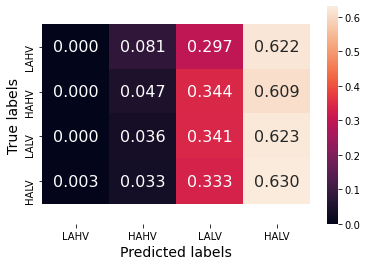

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.45, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
#plt.figure(figsize=(10,7))
#plt.savefig("hmwscalingall.png", dpi=300)
plt.show()